<a href="https://colab.research.google.com/github/xiaomeng-ma/Input-Pronoun/blob/master/Pronoun_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [55]:
!pip install git+https://github.com/tensorflow/docs

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-n8cjz42n
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-n8cjz42n
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0b4bbe1fd98165892e16e4a7e30ac2d10e148891f_-cp36-none-any.whl size=124653 sha256=684f859de58907795299a095d7d19de2a0f4bf1cd7a049d28881f170c9c804db
  Stored in directory: /tmp/pip-ephem-wheel-cache-j1y02jsx/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [50]:
import tensorflow as tf
import matplotlib.pyplot as plt
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])
    plt.show()
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus.reader import CHILDESCorpusReader
import numpy as np
import pandas as pd
from pandas import DataFrame
from nltk.probability import FreqDist
import string
from nltk.stem.wordnet import WordNetLemmatizer

import matplotlib.pyplot as plt
from scipy import stats
import itertools

from scipy import optimize
from scipy.optimize import curve_fit
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import log as ln
import tensorflow_addons as tfa

import numpy
import math
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,Flatten
from keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Embedding, TimeDistributed
from keras.layers import Conv1D,Conv2D, GlobalMaxPooling1D, GlobalMaxPooling2D
from keras.initializers import Constant
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.ticker as ticker
from sklearn.model_selection import StratifiedKFold,train_test_split

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
import gensim


In [9]:
file = '/content/drive/My Drive/QP2/Input Model/encoded_all_data.csv'
dfall = pd.read_csv(file)
namelist = []
for i in dfall.file.values:
  namelist.append(i.split('/')[0])
dfall['name'] = namelist
dfall = shuffle(dfall)
dfall.describe()

,Unnamed: 0,Unnamed: 0.1,encode_cat,encode_pos
count,387811.00000,387811.000000,387811.000000,387811.000000
mean,193905.00000,42463.196753,5.816351,45.908345
std,111951.53696,29575.460284,2.750120,29.484600
min,0.00000,0.000000,0.000000,0.000000
25%,96952.50000,16738.500000,4.000000,20.000000
50%,193905.00000,37210.000000,6.000000,34.000000
75%,290857.50000,66736.500000,8.000000,74.000000
max,387810.00000,110803.000000,10.000000,99.000000


In [10]:
pronoun = ['I', 'me', 'my', 'you', 'your', 'he', 'him','his',
           'she', 'her', 'we','us','our','they','them','their',
           'it','its']
df = dfall.loc[dfall.X.isin(pronoun)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53267 entries, 46014 to 154776
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        53267 non-null  int64 
 1   Unnamed: 0.1      53267 non-null  int64 
 2   file              53267 non-null  object
 3   a                 53196 non-null  object
 4   a_tag             52929 non-null  object
 5   X                 53267 non-null  object
 6   X_tag             53267 non-null  object
 7   b                 53241 non-null  object
 8   b_tag             53009 non-null  object
 9   grammar category  53267 non-null  object
 10  grammar cateogry  53267 non-null  object
 11  encode_cat        53267 non-null  int64 
 12  encode_pos        53267 non-null  int64 
 13  name              53267 non-null  object
dtypes: int64(4), object(10)
memory usage: 6.1+ MB


In [12]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52650 entries, 46014 to 154776
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        52650 non-null  int64 
 1   Unnamed: 0.1      52650 non-null  int64 
 2   file              52650 non-null  object
 3   a                 52650 non-null  object
 4   a_tag             52650 non-null  object
 5   X                 52650 non-null  object
 6   X_tag             52650 non-null  object
 7   b                 52650 non-null  object
 8   b_tag             52650 non-null  object
 9   grammar category  52650 non-null  object
 10  grammar cateogry  52650 non-null  object
 11  encode_cat        52650 non-null  int64 
 12  encode_pos        52650 non-null  int64 
 13  name              52650 non-null  object
dtypes: int64(4), object(10)
memory usage: 6.0+ MB


In [13]:
df.head()

,Unnamed: 0,Unnamed: 0.1,file,a,a_tag,X,X_tag,b,b_tag,grammar category,grammar cateogry,encode_cat,encode_pos,name
46014,46014,46014,Anne/020122.xml,S,/s,you,pro:per,hafta,mod~inf,unknown,NOUN,6,74,Anne
84723,84723,84723,Anne/020502.xml,S,/s,she,pro:sub,says,v,unknown,NOUN,6,84,Anne
105867,105867,8944,Aran/011126.xml,isn't,cop~neg,it,pro:per,E,/e,unknown,NOUN,6,74,Aran
54264,54264,54264,Anne/020212.xml,is,cop,it,pro:per,E,/e,unknown,NOUN,6,74,Anne
332301,332301,47185,Nina/020314.xml,are,cop,you,pro:per,going,part,unknown,NOUN,6,74,Nina


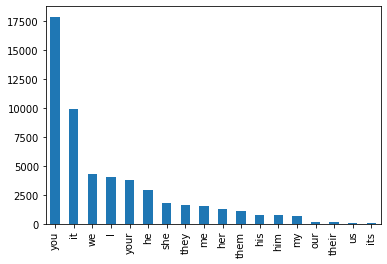

In [14]:
df['X'].value_counts().plot(kind = 'bar')

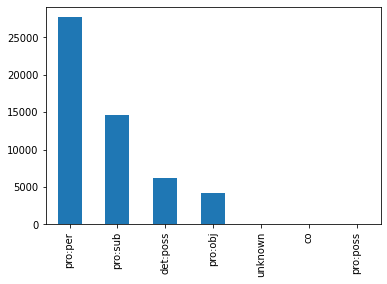

In [15]:
df['X_tag'].value_counts().plot(kind = 'bar')

In [23]:
df.loc[df['X_tag'].isin(['unknonw', 'co', 'pro:poss'])]

,Unnamed: 0,Unnamed: 0.1,file,a,a_tag,X,X_tag,b,b_tag,grammar category,grammar cateogry,encode_cat,encode_pos,name
247907,247907,40180,Eve/020300a.xml,one's,adj,my,co,one,pro:indef,unknown,Unknown,8,12,Eve
275198,275198,21888,Naomi/020107.xml,S,/s,my,co,that,adv,unknown,Unknown,8,12,Naomi
305431,305431,20315,Nina/020115.xml,here's,pro:exist~cop,my,co,let's,v:obj~pro:obj,unknown,Unknown,8,12,Nina
10971,10971,10971,Anne/011106.xml,where's,pro:int~cop,my,co,Mummy,n:prop,unknown,Unknown,8,12,Anne
283921,283921,30611,Naomi/020508.xml,is,cop,my,co,scolding,part,unknown,Unknown,8,12,Naomi
302341,302341,17225,Nina/020024.xml,off,prep,my,co,head,adj,unknown,Unknown,8,12,Nina
95888,95888,95888,Anne/020604.xml,it's,pro:per~cop,my,co,green,adj,unknown,Unknown,8,12,Anne
22024,22024,22024,Anne/011120.xml,S,/s,his,pro:poss,E,/e,unknown,DET,4,78,Anne
196243,196243,99320,Aran/020517.xml,me,pro:obj,my,co,leg,n,unknown,Unknown,8,12,Aran
230752,230752,23025,Eve/011100b.xml,do,v,my,co,dear,co,unknown,Unknown,8,12,Eve


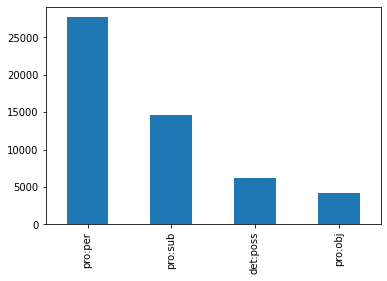

In [24]:
df = df[~(df.X_tag.isin(['co','unknown','pro:poss']))]
df['X_tag'].value_counts().plot(kind = 'bar')


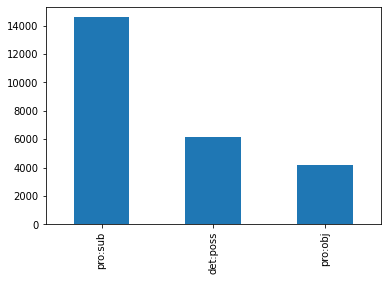

In [27]:
df = df[~(df.X_tag == 'pro:per')]
df['X_tag'].value_counts().plot(kind = 'bar')


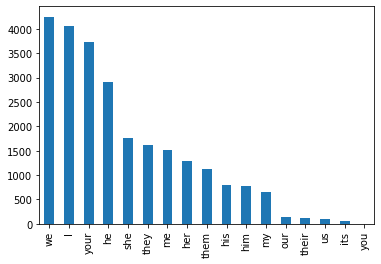

In [28]:
df['X'].value_counts().plot(kind = 'bar')

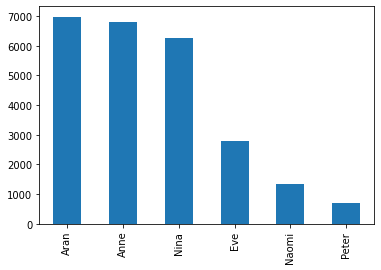

In [29]:
df['name'].value_counts().plot(kind = 'bar')

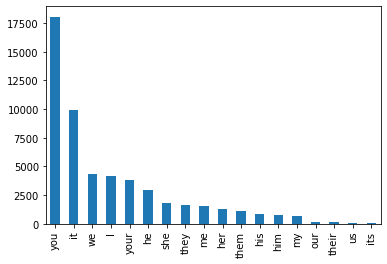

In [30]:
dfpronoun = dfall.loc[dfall.X.isin(pronoun)]
dfpronoun.dropna()
dfpronoun.X.value_counts().plot(kind = 'bar')

In [31]:
df['X_tag'].unique()

array(['pro:sub', 'det:poss', 'pro:obj'], dtype=object)

In [32]:
le = LabelEncoder()
le.fit(df['X_tag'].unique())
LabelEncoder()
encode_pronoun = le.transform(df['X_tag'])
df['encoded_case'] = encode_pronoun

In [34]:
onehot_aX = pd.get_dummies(df.a)
onehot_Xb = pd.get_dummies(df.b)

In [ ]:
list(onehot_aX.values)

In [44]:
df['onehot_aX'] = list(onehot_aX.values)
df['onehot_Xb'] = list(onehot_Xb.values)

In [46]:
df.to_csv('pronoun_table.csv')
!cp pronoun_table.csv "/content/drive/My Drive/QP2/Input Model"

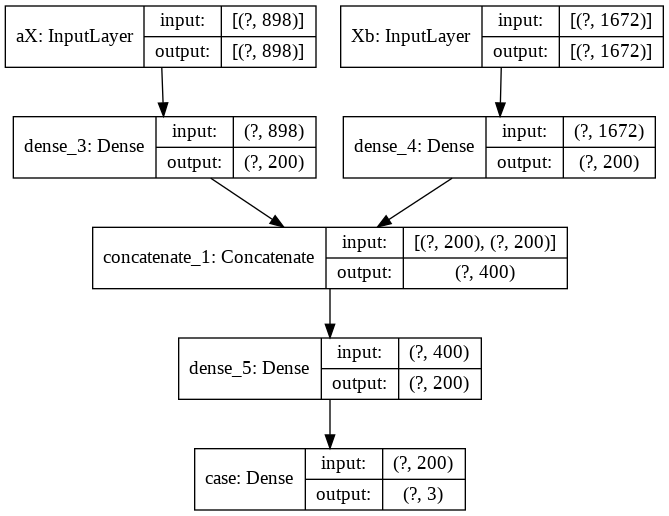

In [48]:
aXshape = onehot_aX.shape[1]
bXshape = onehot_Xb.shape[1]
aX_input = keras.Input(shape=(aXshape,) , name ='aX')
Xb_input = keras.Input(shape=(bXshape,) ,name = 'Xb')
#x = layers.LSTM(64)(aX_input)
aX = layers.Dense(200, activation = 'relu')(aX_input)
#y = layers.LSTM(64)(Xb_input)
Xb = layers.Dense(200, activation='relu')(Xb_input)
x = layers.concatenate([aX, Xb])
x = layers.Dense(200, activation = 'relu')(x)
case_pred = layers.Dense(3, name = 'case')(x)
model = keras.Model(
    inputs = [aX_input, Xb_input],
    outputs = case_pred)
keras.utils.plot_model(model, "aX + Xb model.png", show_shapes= True)


In [51]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy', 'mse'])

In [91]:
aX_train_data, aX_test_data, Xb_train_data, Xb_test_data, case_train_tag, case_test_tag = train_test_split(onehot_aX, onehot_Xb, df['encoded_case'], test_size=0.20, random_state=4)
aX_train = np.asarray(aX_train_data).astype(np.float32)
aX_test = np.asarray(aX_test_data).astype(np.float32)
Xb_train = np.asarray(Xb_train_data).astype(np.float32)
Xb_test = np.asarray(Xb_test_data).astype(np.float32)
y_case_train = np.asarray(case_train_tag).astype(np.float32)
Y_case_test = np.asarray(case_test_tag).astype(np.float32)
print(len(aX_train),aX_train.shape)
print(len(aX_test),aX_test.shape)
print(len(Xb_train),Xb_train.shape )
print(len(Xb_test), Xb_test.shape)
print(len(y_case_train),y_case_train.shape)
print(len(Y_case_test), Y_case_test.shape)

19912 (19912, 898)
4978 (4978, 898)
19912 (19912, 1672)
4978 (4978, 1672)
19912 (19912,)
4978 (4978,)


In [57]:
early_stop = keras.callbacks.EarlyStopping(monitor='accuracy', patience=10)

history = model.fit({"aX": aX_train, "Xb": Xb_train}, 
          y_case_train,
          validation_split = 0.2,
          callbacks=[early_stop, tfdocs.modeling.EpochDots()], 
          epochs=100,
          batch_size = 128)


Epoch 1/100
124/125 [============================>.] - ETA: 0s - loss: 0.0309 - accuracy: 0.9907 - mse: 26.4488
Epoch: 0, accuracy:0.9906,  loss:0.0310,  mse:26.4460,  val_accuracy:0.9729,  val_loss:0.0889,  val_mse:26.4588,  
125/125 [==============================] - 2s 13ms/step - loss: 0.0310 - accuracy: 0.9906 - mse: 26.4460 - val_loss: 0.0889 - val_accuracy: 0.9729 - val_mse: 26.4588
Epoch 2/100
125/125 [==============================] - 2s 13ms/step - loss: 0.0276 - accuracy: 0.9915 - mse: 28.2477 - val_loss: 0.0921 - val_accuracy: 0.9739 - val_mse: 29.1124
Epoch 3/100
125/125 [==============================] - 2s 13ms/step - loss: 0.0262 - accuracy: 0.9916 - mse: 30.3854 - val_loss: 0.0929 - val_accuracy: 0.9729 - val_mse: 30.8200
Epoch 4/100
125/125 [==============================] - 2s 13ms/step - loss: 0.0257 - accuracy: 0.9917 - mse: 32.5198 - val_loss: 0.0961 - val_accuracy: 0.9741 - val_mse: 32.5687
Epoch 5/100
125/125 [==============================] - 2s 13ms/step - los

Text(0, 0.5, 'accuracy')

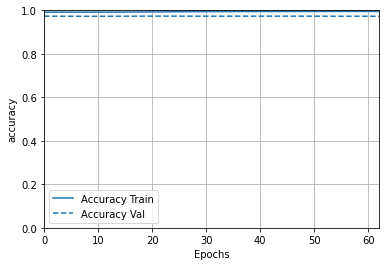

In [58]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Accuracy': history}, metric = "accuracy")
plt.ylim([0, 1])
plt.ylabel('accuracy')

Text(0, 0.5, 'loss')

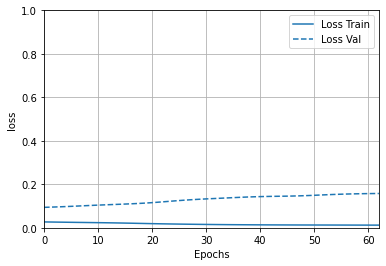

In [59]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Loss': history}, metric = 'loss')
plt.ylim([0, 1])
plt.ylabel('loss')

In [64]:
loss, accuracy, mse = model.evaluate({"aX": aX_test, "Xb": Xb_test}, y={"case": Y_case_test}, verbose=2)
print("Test set loss: {:5.2f} , accuracy: {:5.2f}, mse: {:5.2f}  ".format(loss, accuracy, mse))

156/156 - 0s - loss: 0.1598 - accuracy: 0.9705 - mse: 99.0103
Test set loss:  0.16 , accuracy:  0.97, mse: 99.01  


In [66]:
from sklearn import metrics
y_pred = model.predict([aX_test,Xb_test])
y_pred = np.argmax(y_pred, axis = 1)

target_names = ['det:poss','pro:obj','pro:sub']
print(metrics.classification_report(Y_case_test, y_pred, digits=3, target_names=target_names))

              precision    recall  f1-score   support

    det:poss      0.952     0.948     0.950      1230
     pro:obj      0.946     0.940     0.943       802
     pro:sub      0.985     0.988     0.986      2946

    accuracy                          0.970      4978
   macro avg      0.961     0.959     0.960      4978
weighted avg      0.970     0.970     0.970      4978



In [67]:
aX_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [69]:
df['onehot_aX']

84723     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
77948     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
340740    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
11812     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
329542    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                                ...                        
144403    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
6499      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
213239    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
81778     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
154776    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: onehot_aX, Length: 24890, dtype: object

In [75]:
name_train, name_test, X_train, X_test, aXX80, aXX20 = train_test_split(df['name'], df['X'], df['onehot_aX'], test_size = 0.2, random_state = 4)

In [85]:
Xb80, Xb20, case80, case20 = train_test_split(df['onehot_Xb'], df['encoded_case'], test_size=0.20, random_state=4)


In [97]:
dftest = pd.DataFrame(y_pred)
dftest.columns = ['pred value']
dftest['name'] = name_test.values
dftest['pronoun'] = X_test.values
dftest['case'] = Y_case_test 

In [96]:
name_test.values

223354     Eve
246012     Eve
65243     Anne
154521    Aran
372373    Nina
          ... 
206437    Aran
57954     Anne
234171     Eve
139701    Aran
94196     Anne
Name: name, Length: 4978, dtype: object

In [98]:
dftest.head()

,pred value,name,pronoun,case
0,0,Eve,my,0.0
1,2,Eve,I,2.0
2,0,Anne,his,0.0
3,2,Aran,they,2.0
4,1,Nina,him,1.0


In [99]:
dftest['correct'] = np.where((dftest['pred value'] == dftest['case']) , 1, 0)

In [103]:
dftest.describe()

,pred value,case,correct
count,4978.000000,4978.000000,4978.000000
mean,1.347730,1.344717,0.970470
std,0.848012,0.848666,0.169303
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,1.000000
75%,2.000000,2.000000,1.000000
max,2.000000,2.000000,1.000000


In [107]:
dftest.to_csv('prediction_table.csv')
!cp prediction_table.csv "/content/drive/My Drive/QP2/Input Model/"

In [123]:
child_rate = []
for i in dftest.name.unique():
  dff = dftest.loc[dftest.name == i]
  corr = sum(dff.correct)
  total = len(dff)
  rate = corr/total
  child_rate.append([i,rate])

In [125]:
pd.DataFrame(child_rate)

,0,1
0,Eve,0.960894
1,Anne,0.967286
2,Aran,0.979109
3,Nina,0.968900
4,Naomi,0.966543
5,Peter,0.970803


In [127]:
pronoun_rate = []
for i in dftest.pronoun.unique():
  dff = dftest.loc[dftest.pronoun == i]
  corr = sum(dff.correct)
  total = len(dff)
  rate = corr/total
  pronoun_rate.append([i,rate])
pd.DataFrame(pronoun_rate)

,0,1
0,my,0.934783
1,I,0.992308
2,his,0.954802
3,they,0.993827
4,him,0.960784
5,me,0.957655
6,we,0.993190
7,she,0.991453
8,he,0.970492
9,your,0.955714


In [133]:
dfI.loc[dfI.name == 'Eve'].correct

1       1
55      1
91      1
148     1
161     1
       ..
4808    1
4839    1
4856    1
4893    1
4975    1
Name: correct, Length: 117, dtype: int64

In [136]:
dfIEve = dfI.loc[dfI.name == 'Eve']
sum(dfIEve.correct)/len(dfIEve)

0.9743589743589743

In [ ]:
pronoun_rate = []
for i in dftest.pronoun.unique():
  dff = dftest.loc[dftest.pronoun == i]
  corr = sum(dff.correct)
  total = len(dff)
  rate = corr/total
  pronoun_rate.append([i,rate])
pd.DataFrame(pronoun_rate)

In [149]:
pronoun_name = []
for pronoun in dftest.pronoun.unique():
  pron_name = []
  dfpronoun = dftest.loc[dftest.pronoun == pronoun]
  for name in dftest.name.unique():
    dfpn = dfpronoun.loc[dfpronoun.name == name]
    corr = sum(dfpn.correct)
    total = len(dfpn)
    if total != 0:
      rate = sum(dfpn.correct)/len(dfpn)
    else:
      rate = corr
    pron_name.append(rate)
  pronoun_name.append(pron_name)


In [143]:
dftest.pronoun.unique()

array(['my', 'I', 'his', 'they', 'him', 'me', 'we', 'she', 'he', 'your',
       'her', 'them', 'our', 'their', 'us', 'its'], dtype=object)

In [151]:
rate_table = pd.DataFrame(pronoun_name, 
                          index=dftest.pronoun.unique(), 
                          columns =dftest.name.unique())
rate_table

,Eve,Anne,Aran,Nina,Naomi,Peter
my,0.903226,0.952381,1.000000,0.921053,0.875000,1.000000
I,0.974359,1.000000,1.000000,0.983957,1.000000,1.000000
his,1.000000,0.914894,0.979167,0.945455,1.000000,1.000000
they,1.000000,0.989583,0.990099,1.000000,1.000000,1.000000
him,0.928571,0.920000,0.960000,0.980769,1.000000,1.000000
me,1.000000,0.944444,0.953125,0.988636,0.869565,0.888889
we,1.000000,0.988679,0.994885,0.993506,1.000000,1.000000
she,1.000000,1.000000,1.000000,0.987013,0.954545,0.800000
he,0.871795,0.960000,0.990244,0.984211,0.933333,0.909091
your,0.968992,0.956897,0.936047,0.944751,0.985294,1.000000


In [152]:
rate_table.to_csv('rate_table.csv')
!cp rate_table.csv "/content/drive/My Drive/QP2/Input Model/"